A.	Collecte des données
1.	Source du Corpus
Nous avons collecté notre corpus à partir du "Corpus politique de Twitter", disponible à [insérer le lien]. Ce corpus fournit une diversité de tweets provenant de différentes sources politiques sur Twitter, ce qui en fait une ressource pertinente pour notre étude de classification.


In [6]:
import nltk as nltk
import requests

class DataDownloader:
    def __init__(self, url, local_filename):
        self.url = url
        self.local_filename = local_filename

    def download_data(self):
        response = requests.get(self.url)
        if response.status_code == 200:
            with open(self.local_filename, 'wb') as file:
                file.write(response.content)
            print(f"Les données ont été téléchargées avec succès dans le fichier {self.local_filename}.")
        else:
            print(f"Échec du téléchargement. Statut de la requête : {response.status_code}")

In [7]:
 # Utilisation des classes
url = "https://www.usna.edu/Users/cs/nchamber/data/twitter/general%20tweets.txt"
local_filename = "general_tweets.txt"

# Télécharger les données
print("------------ Télécharger les données ---------------")
downloader = DataDownloader(url, local_filename)
downloader.download_data()

------------ Télécharger les données ---------------
Les données ont été téléchargées avec succès dans le fichier general_tweets.txt.


2.	Description des données (format, taille, etc.)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataExplorer:
    def __init__(self, filename):
        self.filename = filename
        self.df = None  # Ajoutez une variable pour stocker le DataFrame exploré

    def explore_data(self):
        # Charger les données dans un DataFrame
        self.df = pd.read_csv(self.filename, delimiter='\t', header=None, names=['Label', 'Text'])

        # Afficher les premières lignes du DataFrame pour comprendre la structure des données
        print(self.df.head())

        # Distribution des classes
        print("----------Distribution des classes----------------")
        class_distribution = self.df['Label'].value_counts()
        print("Distribution des classes :\n", class_distribution)

        # Longueur des tweets
        self.df['Tweet_Length'] = self.df['Text'].apply(len)

        # Répartition de la longueur des tweets
        print("----------Répartition de la longueur des tweets----------------")
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df, x='Tweet_Length', hue='Label', bins=30, kde=True, multiple="stack")
        plt.title('Répartition de la longueur des tweets par classe')
        plt.xlabel('Longueur du tweet')
        plt.ylabel('Fréquence')
        plt.show()

    def get_explored_data(self):
        # Renvoie le DataFrame exploré
        return self.df

----------Explorer les données----------------
  Label                                               Text
0   NOT  Bumping dj sefs mixtape nowww this is my music...
1   NOT  #ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...
2   NOT  trick or treating at the mall today; ZOO! last...
3   NOT  @Ussk81 PMSL!!! I try not to stare but I can't...
4   NOT  @Sc0rpi0n676 btw - is there a remote chance i ...
----------Distribution des classes----------------
Distribution des classes :
 Label
NOT      1972
POLIT      28
Name: count, dtype: int64
----------Répartition de la longueur des tweets----------------


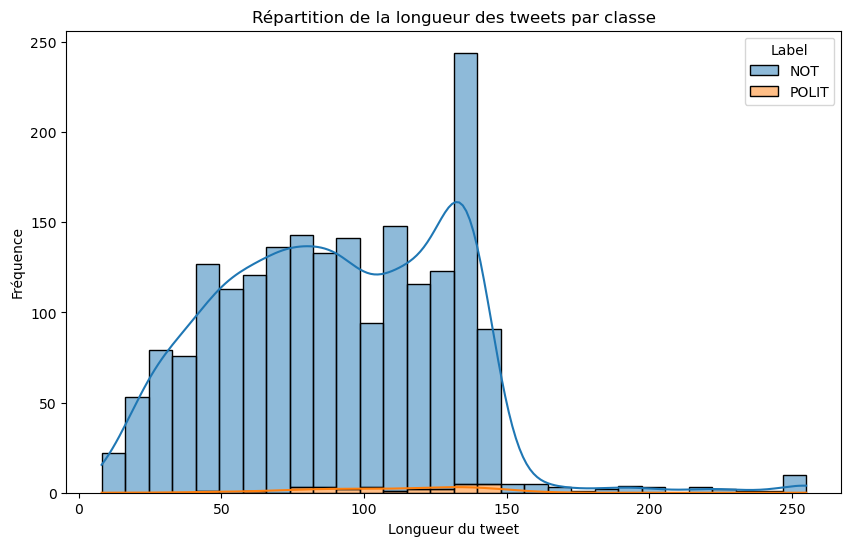

In [12]:
# Explorer les données
print("----------Explorer les données----------------")
explorer = DataExplorer(filename=local_filename)
explorer.explore_data()
explored_data = explorer.get_explored_data().copy()

3.	Traitements préliminaires (nettoyage, prétraitement)

# Installation de nltk
pip install nltk

In [16]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 162.5 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 202.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/269.5 kB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 112.6/269.5 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 245.8/269.5 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 269.5/269.5 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Télécharger les données nécessaires pour NLTK
nltk.download('punkt')

class DataPreprocessor:
    def __init__(self, filename):
        self.filename = filename

    def preprocess_data(self):
        # Charger les données dans un DataFrame
        df = pd.read_csv(self.filename, delimiter='\t', header=None, names=['Label', 'Text'])

        # Nettoyage des tweets
        df['Cleaned_Text'] = df['Text'].apply(self.clean_tweet)

        # Tokenisation des tweets
        df['Tokenized_Text'] = df['Cleaned_Text'].apply(self.tokenize_text)

        # Réduction des mots à leur forme de base (utilisation du stemming)
        #df['Stemmed_Text'] = df['Tokenized_Text'].apply(self.stem_text)

        # Réduction des mots à leur forme de base (utilisation de la lemmatisation)
        df['Lemmatized_Text'] = df['Tokenized_Text'].apply(self.lemmatize_text)

        return df[['Text', 'Label', 'Cleaned_Text', 'Tokenized_Text', 'Lemmatized_Text']]

    def clean_tweet(self, text):
        # Supprimer les mentions
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        # Supprimer les liens
        text = re.sub('https?://[A-Za-z0-9./]+', '', text)
        # Supprimer la ponctuation et les caractères spéciaux
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convertir le texte en minuscules
        text = text.lower()
        return text

    def tokenize_text(self, text):
        # Tokenisation des tweets en mots
        tokens = word_tokenize(text)
        return tokens

    def stem_text(self, tokens):
        # Réduction des mots à leur forme de base (utilisation du stemming)
        stemmer = PorterStemmer()
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        return stemmed_tokens

    def lemmatize_text(self, tokens):
        # Réduction des mots à leur forme de base (utilisation de la lemmatisation)
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return lemmatized_tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
import pandas as pd
# Télécharger les données nécessaires pour NLTK
nltk.download('punkt')
nltk.download('wordnet')


# Prétraitement des données
print("------------ Prétraitement des données ---------------")
preprocessor = DataPreprocessor(filename=local_filename)
preprocessed_data = preprocessor.preprocess_data()

# Afficher les premières lignes du DataFrame résultant
print(preprocessed_data.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


------------ Prétraitement des données ---------------
                                                Text Label  \
0  Bumping dj sefs mixtape nowww this is my music...   NOT   
1  #ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...   NOT   
2  trick or treating at the mall today; ZOO! last...   NOT   
3  @Ussk81 PMSL!!! I try not to stare but I can't...   NOT   
4  @Sc0rpi0n676 btw - is there a remote chance i ...   NOT   

                                        Cleaned_Text  \
0  bumping dj sefs mixtape nowww this is my music...   
1  ieroween the story of ieroween the video    ju...   
2  trick or treating at the mall today zoo last y...   
3   pmsl i try not to stare but i cant help it li...   
4   btw  is there a remote chance i will see you ...   

                                      Tokenized_Text  \
0  [bumping, dj, sefs, mixtape, nowww, this, is, ...   
1  [ieroween, the, story, of, ieroween, the, vide...   
2  [trick, or, treating, at, the, mall, today, zo...   
3  [pmsl, i

B.	Représentation du texte
1.	Utilisation TF-IDF pour la représentation numérique


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

class TextRepresentation:
    def __init__(self, df):
        self.df = df
        self.vectorizer = None  # Ajoutez cette ligne pour initialiser l'attribut vectorizer

    def tfidf_representation(self):
        # Séparation des données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(self.df['Lemmatized_Text'].apply(' '.join), self.df['Label'], test_size=0.2, random_state=42)

        # Création d'un vecteur TF-IDF
        self.vectorizer = TfidfVectorizer(max_features=5000)  # Vous pouvez ajuster le nombre maximal de fonctionnalités
        X_train_tfidf = self.vectorizer.fit_transform(X_train)
        X_test_tfidf = self.vectorizer.transform(X_test)

        return X_train_tfidf, X_test_tfidf, y_train, y_test


In [28]:
 # Utilisation de la classe TextRepresentation
representation = TextRepresentation(df=preprocessed_data)
X_train_tfidf, X_test_tfidf, y_train, y_test = representation.tfidf_representation()

In [15]:
from separation_donnees.separation import DataSplitter

# Utilisation de la classe DataSplitter
splitter = DataSplitter(X=X_train_tfidf, y=y_train)
X_train, X_val, X_test, y_train, y_val, y_test = splitter.split_data()

# Afficher la forme des ensembles
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (960, 5000)
Shape of X_val: (320, 5000)
Shape of X_test: (320, 5000)


In [16]:
# Création d'un DataFrame pour l'ensemble d'entraînement
train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=representation.vectorizer.get_feature_names_out())
train_df['Label'] = y_train

# Afficher les premières lignes du DataFrame d'entraînement
print("DataFrame d'entraînement:")
print(train_df.head())

# Création d'un DataFrame pour l'ensemble de test
test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=representation.vectorizer.get_feature_names_out())
test_df['Label'] = y_test

# Afficher les premières lignes du DataFrame de test
print("\nDataFrame de test:")
print(test_df.head())


DataFrame d'entraînement:
   aaaaaahhhhhhh  aaaah  aahh  aan  aaron   ab  abandoned  abba  abis  able  \
0            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
1            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
2            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
3            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
4            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   

   ...  zii  zijn  zina  zombie  zombifiedhalloween  zona  zone  zoo  zoough  \
0  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
1  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
2  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
3  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
4  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   

   Label  
0    Na

C.	Modélisation
1.	Sélection du modèle de classification (Naive Bayes)


In [29]:
class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = MultinomialNB()

    def train_classifier(self, X_train, y_train):
        # Entraîner le classificateur sur les données d'entraînement
        self.classifier.fit(X_train, y_train)

    def evaluate_classifier(self, X, y, set_name):
        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

    def classify(self, tweet):
        # Prétraitement du tweet (nettoyage, lemmatisation, etc.) si nécessaire

        # Utilisez le modèle pour classer le tweet
        tweet_tfidf = self.vectorizer.transform([tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


----------------------TextClassifier -------------------------


In [30]:
print("----------------------TextClassifier -------------------------")
classifier = TextClassifier(X_train_tfidf, X_test_tfidf, X_test_tfidf, y_train, y_test, y_test)
print("----------------------Entrainement TextClassifier -------------------------")
classifier.train_classifier(classifier.X_train, classifier.y_train)

classifier.evaluate_classifier()
print("----------------------Évaluer le classificateur sur l'ensemble de test -------------------------")
classifier.evaluate_classifier(classifier.X_test, classifier.y_test, "de test")

----------------------Évaluer le classificateur sur l'ensemble de test -------------------------
Précision sur l'ensemble de test: 0.9850

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

         NOT       0.98      1.00      0.99       394
       POLIT       0.00      0.00      0.00         6

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.97      0.98      0.98       400

Matrice de confusion sur l'ensemble de test:

[[394   0]
 [  6   0]]


C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

2.	Ajustement des hyperparamètres par recherche par grille

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = None

    def train_classifier(self, alpha=1.0):
        # Initialiser un classificateur Naive Bayes avec l'hyperparamètre alpha
        classifier = MultinomialNB(alpha=alpha)

        # Entraîner le classificateur sur les données d'entraînement
        classifier.fit(self.X_train, self.y_train)

        self.classifier = classifier

        return classifier

    def plot_confusion_matrix(self, cm, set_name, classes):
        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

    def plot_roc_curve(self, y, y_pred, set_name):
        # Courbe ROC (si les classes sont binaires)
        if len(set(y)) == 2:
            fpr, tpr, _ = roc_curve(y, y_pred)
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('Taux de faux positifs')
            plt.ylabel('Taux de vrais positifs')
            plt.title(f'Courbe ROC sur l\'ensemble {set_name}')
            plt.legend(loc='lower right')
            plt.show()

    def evaluate_classifier(self, X, y, set_name):
        # Transformer les données en utilisant le vecteur TF-IDF existant
        X_tfidf = X

        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X_tfidf)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        cm = confusion_matrix(y, y_pred)
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(cm)

        # Visualiser la matrice de confusion
        self.plot_confusion_matrix(cm, set_name, sorted(set(y)))

        # Visualiser la courbe ROC
        self.plot_roc_curve(y, y_pred, set_name)




----------------------Évaluer le classificateur sur l'ensemble de test -------------------------
Précision sur l'ensemble de test: 0.9850

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

         NOT       0.98      1.00      0.99       394
       POLIT       0.00      0.00      0.00         6

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.97      0.98      0.98       400

Matrice de confusion sur l'ensemble de test:

[[394   0]
 [  6   0]]


C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

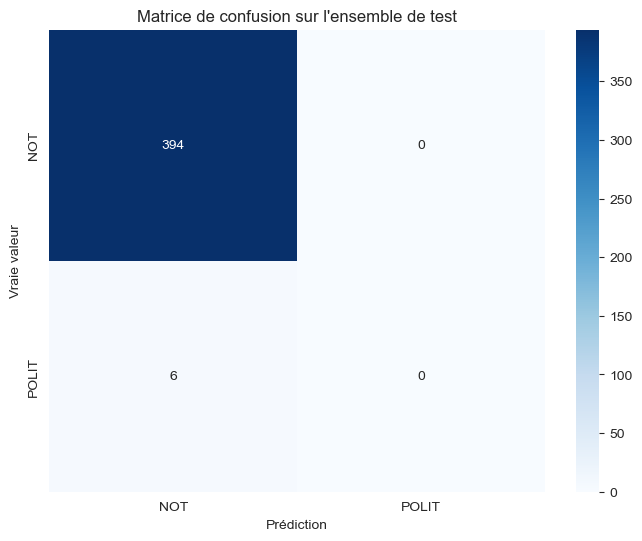

ValueError: y_true takes value in {'NOT', 'POLIT'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [46]:
# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test)
classifier.train_classifier()
print("----------------------Évaluer le classificateur sur l'ensemble de test -------------------------")
classifier.evaluate_classifier(classifier.X_test, classifier.y_test, "de test")



In [39]:
# Ajustement des hyperparamètres sur l'ensemble de validation
alphas = [0.05, 0.1, 0.5, 1.0, 1.5, 2.0]  # Vous pouvez ajuster cette liste d'hyperparamètres
best_alpha = None
best_accuracy = 0.0

for alpha in alphas:
    print(f"Entraînement avec alpha={alpha}")
    trained_classifier = classifier.train_classifier(alpha=alpha)

    # Évaluer le modèle sur l'ensemble de validation
    accuracy_validation = accuracy_score(y_val, trained_classifier.predict(X_val))
    print(f"Précision sur l'ensemble de validation: {accuracy_validation:.4f}\n")

    # Mettre à jour le meilleur alpha si nécessaire
    if accuracy_validation > best_accuracy:
        best_accuracy = accuracy_validation
        best_alpha = alpha

Entraînement avec alpha=0.05
Précision sur l'ensemble de validation: 1.0000

Entraînement avec alpha=0.1
Précision sur l'ensemble de validation: 0.9969

Entraînement avec alpha=0.5
Précision sur l'ensemble de validation: 0.9875

Entraînement avec alpha=1.0
Précision sur l'ensemble de validation: 0.9875

Entraînement avec alpha=1.5
Précision sur l'ensemble de validation: 0.9875

Entraînement avec alpha=2.0
Précision sur l'ensemble de validation: 0.9875

